# Exam - Advanced Methods in Applied Statistics 2024 - Emilie Jessen

## Problem 4

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy 
from iminuit import Minuit
import nestle

In [2]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [3]:
# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
mpl.rc('font', **font)

axes = {'facecolor': 'ghostwhite'}
mpl.rc('axes', **axes)

# Add grid
mpl.rc('axes', grid=True)

# Set custom color cycle
custom_colors= ['dodgerblue', 'red', 'limegreen', 'orange', 'orchid', 'black', 'slategrey', 
                'navy', 'magenta', 'forestgreen', 'lightblue', 'maroon', 'gold', 'lightcoral', 
                'mediumseagreen', 'darkorange', 'darkviolet', 'dimgray', 'darkblue', 'darkred',]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)

# Set inside tickmarks
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True

In [25]:
save_plots = True
np.random.seed(42)

### Problem 4a

In [5]:
use_columns = ['ID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 
               'TimeDifference', 'Neighbourhood', 'Diabetes', 
               'Alcoholism', 'Handcap', 'SMS_received', 'R1', 'No-show']

train_data = pd.read_csv('Data/Exam_2024_Prob4_TrainData.csv', usecols=use_columns)
test_data = pd.read_csv('Data/Exam_2024_Prob4_TestData.csv', usecols=use_columns)
blind_data = pd.read_csv('Data/Exam_2024_Prob4_BlindData.csv', usecols=use_columns[:-1])

In [6]:
# Examine training and test data 
N_train = len(train_data)
N_test = len(test_data)

N_signal_train = np.sum(train_data['No-show'] == 1)
N_signal_test = np.sum(test_data['No-show'] == 1)

# Get ratios of no-shows
train_ratio = np.sum(train_data['No-show'] == 1) / np.sum(train_data['No-show'] == 0)
test_ratio = np.sum(test_data['No-show'] == 1) / np.sum(test_data['No-show'] == 0)

print('TRAINING DATA')
print(f'Number of samples: {N_train}')
print(f'Number of show-ups: {N_train - N_signal_train}')
print(f'Number of no-shows: {N_signal_train}')
print(f'Ratio of no-shows: {train_ratio:.2f}')

print('\nTEST DATA')
print(f'Number of samples: {N_test}')
print(f'Number of show-ups: {N_test - N_signal_test}')
print(f'Number of no-shows: {N_signal_test}')
print(f'Ratio of no-shows: {test_ratio:.2f}')

TRAINING DATA
Number of samples: 20000
Number of show-ups: 15951
Number of no-shows: 4049
Ratio of no-shows: 0.25

TEST DATA
Number of samples: 20000
Number of show-ups: 15987
Number of no-shows: 4013
Ratio of no-shows: 0.25


In [7]:
# Define the features and target for training data
X_train = train_data.drop(columns=['ID', 'No-show'])
y_train = train_data['No-show']

# Define the features and target for test data
X_test = test_data.drop(columns=['ID', 'No-show'])
y_test = test_data['No-show']

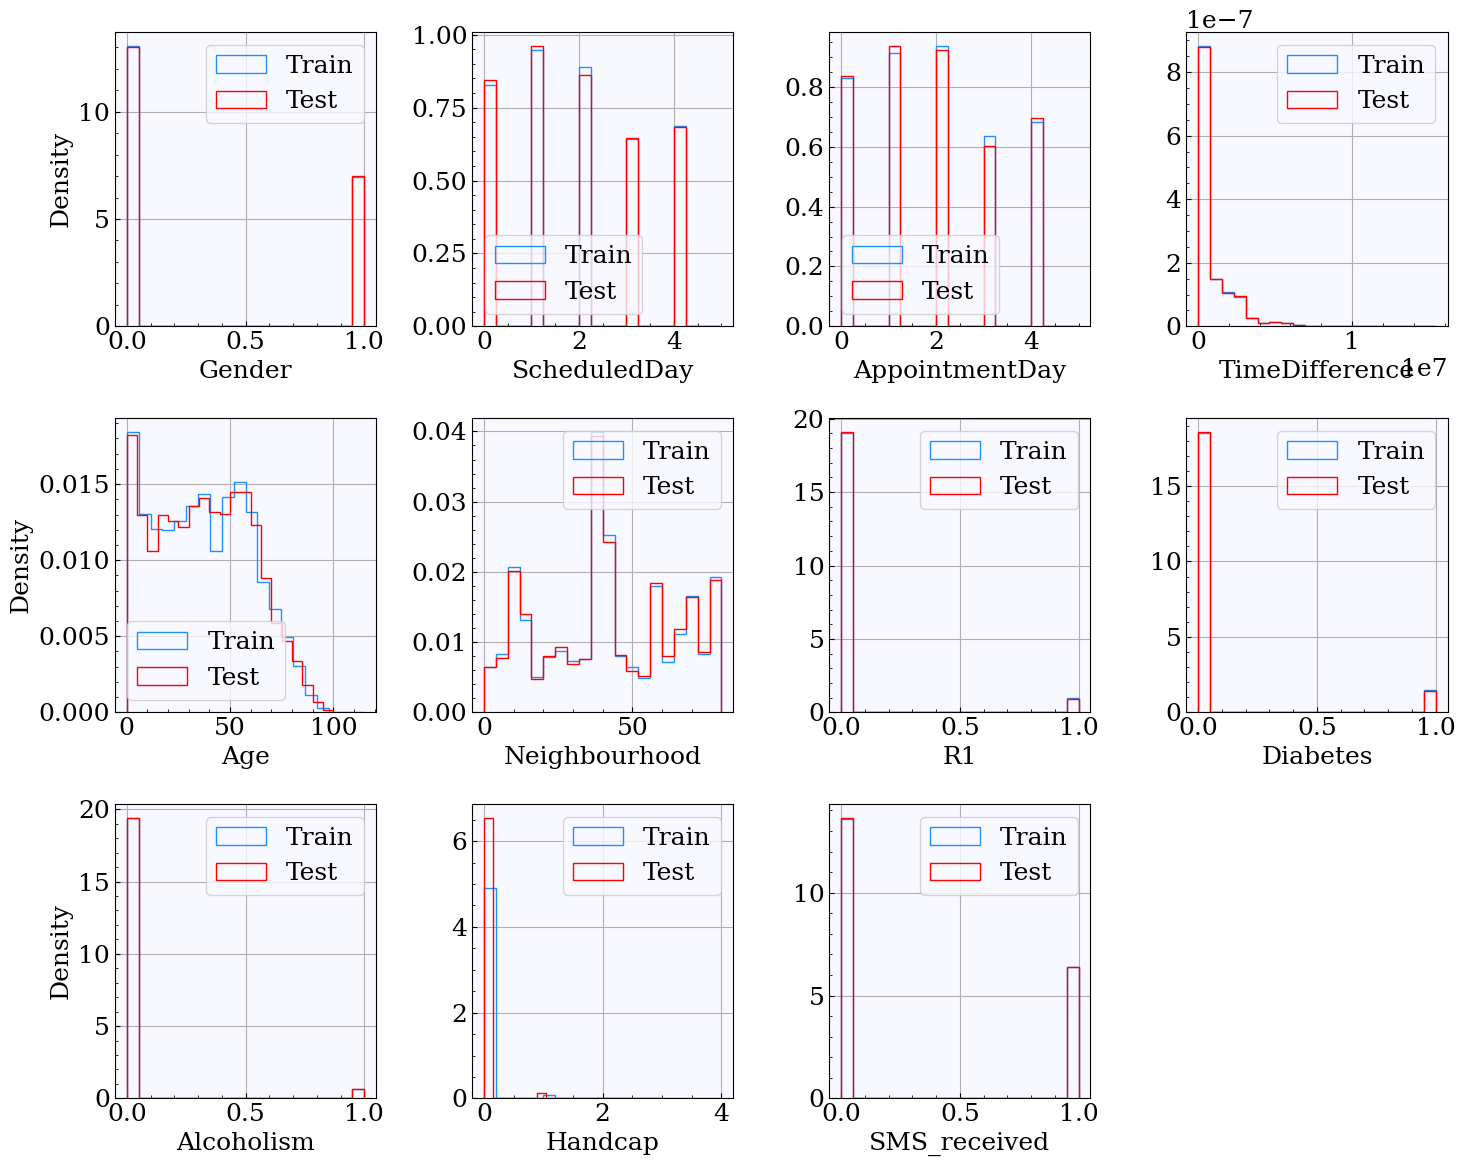

In [8]:
# Plot distributions of training variables for training and test data

fig, ax = plt.subplots(3, 4, figsize=(15, 12))
fig.delaxes(ax[2,3])

for i, col in enumerate(X_train.columns):
    ax[i//4, i%4].hist(X_train[col], bins=20, histtype='step', label='Train', density=True)
    ax[i//4, i%4].hist(X_test[col], bins=20, histtype='step', label='Test', density=True)
    ax[i//4, i%4].set_xlabel(col)
    ax[i//4, i%4].legend()

ax[0, 0].set_ylabel('Density')
ax[1, 0].set_ylabel('Density')
ax[2, 0].set_ylabel('Density')
fig.tight_layout()

In [9]:
# Random search for hyperparameter optimization
# Specify parameters and distributions to sample from

model = LGBMClassifier(force_col_wise=True, random_state=42, eval_metric='logloss')

parameters_RandomSearch = {'max_depth': scipy.stats.randint(2, 5), 
                           'n_estimators': scipy.stats.randint(50, 400),
                           'learning_rate': scipy.stats.uniform(0.01, 0.15),}

# Chose number of iterations
k = 5
n_iter_search = 25

RandomSearch = RandomizedSearchCV(model, 
                                  param_distributions=parameters_RandomSearch,
                                  n_iter=n_iter_search,
                                  return_train_score=True,
                                  cv=k,
                                  scoring = 'balanced_accuracy', 
                                  random_state=42)

# Fit the random search instance
RandomSearch.fit(X_train, y_train)

# Get results              
print("Random Search: \tBest parameters: ", RandomSearch.best_params_, f", Best scores: {RandomSearch.best_score_:.3f}")

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 3240, number of negative: 12760
[LightGBM] [Info] Total Bins 458
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202500 -> initscore=-1.370742
[LightGBM] [Info] Start training from score -1.370742
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

In [26]:
# Set the hyperparameters found
max_depth_RS = RandomSearch.best_params_['max_depth']
n_estimators_RS = RandomSearch.best_params_['n_estimators']
learning_rate_RS = RandomSearch.best_params_['learning_rate']

# Print the best hyperparameters
print(f'Best hyperparameters found:\n max_depth={max_depth_RS},\n n_estimators={n_estimators_RS}\n learning_rate={learning_rate_RS}')

Best hyperparameters found:
 max_depth=3,
 n_estimators=353
 learning_rate=0.14422410256414733


In [27]:
# Define the model
model = LGBMClassifier(n_estimators=n_estimators_RS, 
                       max_depth=max_depth_RS, 
                       learning_rate=learning_rate_RS, 
                       random_state=42, 
                       force_col_wise=True)

# Fit the model
model.fit(X_train, y_train)

# Predict the target for the training data
y_pred_bin_train = model.predict(X_train)
y_pred_train = model.predict_proba(X_train)
acc_train = accuracy_score(y_train, y_pred_bin_train)


# Predict the target for the test data
y_pred_bin_test = model.predict(X_test)
y_pred_test = model.predict_proba(X_test)
acc_test = accuracy_score(y_test, y_pred_bin_test)


[LightGBM] [Info] Number of positive: 4049, number of negative: 15951
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 20000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202450 -> initscore=-1.371052
[LightGBM] [Info] Start training from score -1.371052
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [28]:
print(f'Accuracy for training data: {acc_train:.3f}')  
print(f'Accuracy for test data: {acc_test:.3f}')

Accuracy for training data: 0.826
Accuracy for test data: 0.813


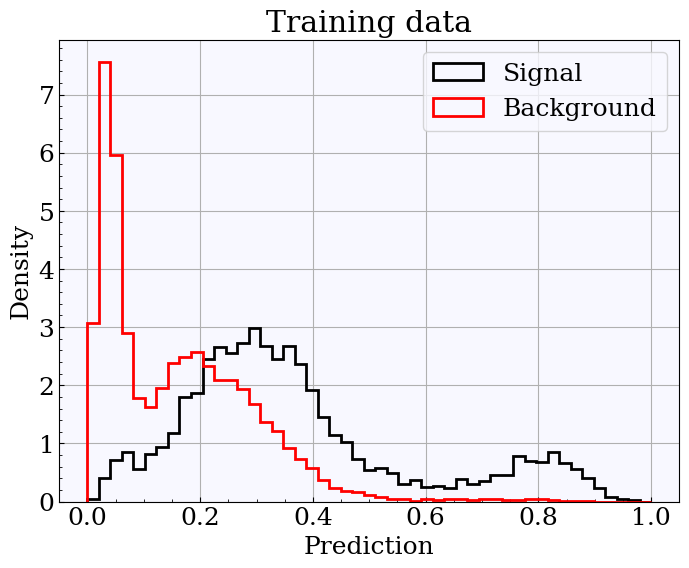

In [29]:
# Get the signal and background predictions for the training data
y_pred_signal_train = y_pred_train[:, 1][y_train == 1]
y_pred_bkg_train = y_pred_train[:, 1][y_train == 0]

# Plot the distributions
fig, ax = plt.subplots(figsize=(8, 6))

bins = np.linspace(0, 1, 50)
ax.hist(y_pred_signal_train, bins=bins, histtype='step', color='k', label='Signal', lw=2, density=True)
ax.hist(y_pred_bkg_train, bins=bins, histtype='step', color='red', label='Background', lw=2, density=True)
ax.set_xlabel('Prediction')
ax.set_ylabel('Density')
ax.set_title('Training data')
ax.legend()

if save_plots:
    plt.savefig('Figures/Prob4_TrainPred.png', dpi=300)

/var/folders/g5/x6l6jbcj4tb_kz1_c88z7rlc0000gn/T/ipykernel_2809/1183819206.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + ['No-show', 'Show-up'])
/var/folders/g5/x6l6jbcj4tb_kz1_c88z7rlc0000gn/T/ipykernel_2809/1183819206.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + ['No-show', 'Show-up'])


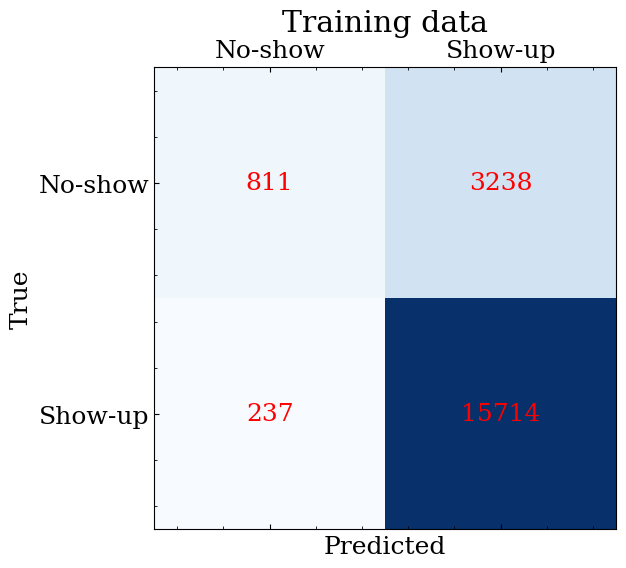

In [30]:
# Get confusion matrix for the traning data
from sklearn.metrics import confusion_matrix

conf_matrix_train = confusion_matrix(y_train, y_pred_bin_train)[::-1, ::-1]

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))

cax = ax.matshow(conf_matrix_train, cmap='Blues')

for i in range(2):
    for j in range(2):
        ax.text(j, i, f'{conf_matrix_train[i, j]}', ha='center', va='center', color='red')

ax.set_xticklabels([''] + ['No-show', 'Show-up'])
ax.set_yticklabels([''] + ['No-show', 'Show-up'])
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Training data')

ax.grid(False)

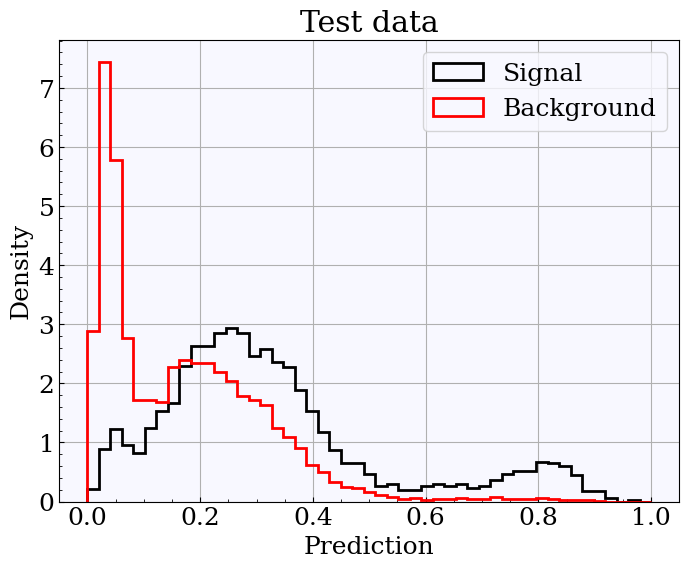

In [31]:
# Get the signal and background predictions for the test data
y_pred_signal_test = y_pred_test[:, 1][y_test == 1]
y_pred_bkg_test = y_pred_test[:, 1][y_test == 0]

# Plot the distributions
fig, ax = plt.subplots(figsize=(8, 6))

bins = np.linspace(0, 1, 50)
ax.hist(y_pred_signal_test, bins=bins, histtype='step', color='k', label='Signal', lw=2, density=True)
ax.hist(y_pred_bkg_test, bins=bins, histtype='step', color='red', label='Background', lw=2, density=True)
ax.set_xlabel('Prediction')
ax.set_ylabel('Density')
ax.set_title('Test data')
ax.legend()

if save_plots:
    plt.savefig('Figures/Prob4_TestPred.png', dpi=300)

/var/folders/g5/x6l6jbcj4tb_kz1_c88z7rlc0000gn/T/ipykernel_2809/1639900457.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + ['No-show', 'Show-up'])
/var/folders/g5/x6l6jbcj4tb_kz1_c88z7rlc0000gn/T/ipykernel_2809/1639900457.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + ['No-show', 'Show-up'])


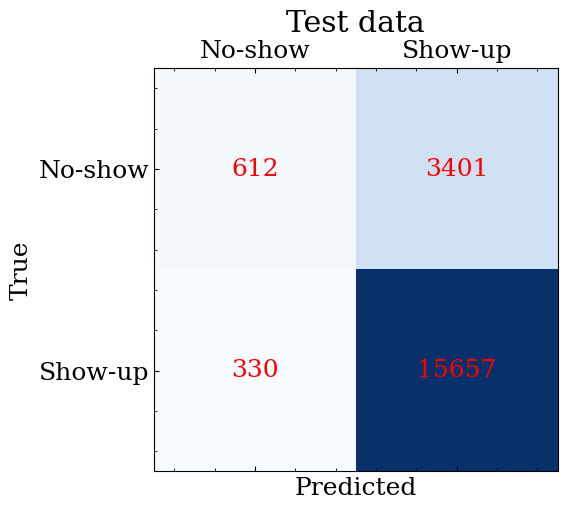

In [40]:
# Get confusion matrix for the test data
conf_matrix_test = confusion_matrix(y_test, y_pred_bin_test)[::-1, ::-1]

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))

cax = ax.matshow(conf_matrix_test, cmap='Blues')

for i in range(2):
    for j in range(2):
        ax.text(j, i, f'{conf_matrix_test[i, j]}', ha='center', va='center', color='red')

ax.set_xticklabels([''] + ['No-show', 'Show-up'])
ax.set_yticklabels([''] + ['No-show', 'Show-up'])
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Test data')

ax.grid(False)

fig.tight_layout()

if save_plots:
    plt.savefig('Figures/Prob4_ConfMatrix_test.png', dpi=300)

In [33]:
def TPR(confusion_matrix):
    return confusion_matrix[0, 0] / np.sum(confusion_matrix[0])

def FPR(confusion_matrix):
    return confusion_matrix[1, 0] / np.sum(confusion_matrix[1])

def accuracy(confusion_matrix):
    return np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)

In [34]:
# Calculate TP and FP rates
TPR_train = TPR(conf_matrix_train)
FPR_train = FPR(conf_matrix_train)
acc_train = accuracy(conf_matrix_train)

TPR_test = TPR(conf_matrix_test)
FPR_test = FPR(conf_matrix_test)
acc_test = accuracy(conf_matrix_test)

print(f'Training data: TPR = {TPR_train:.3f}, FPR = {FPR_train:.3f}, Accuracy = {acc_train:.3f}')
print(f'Test data: TPR = {TPR_test:.3f}, FPR = {FPR_test:.3f}, Accuracy = {acc_test:.3f}')

Training data: TPR = 0.200, FPR = 0.015, Accuracy = 0.826
Test data: TPR = 0.153, FPR = 0.021, Accuracy = 0.813


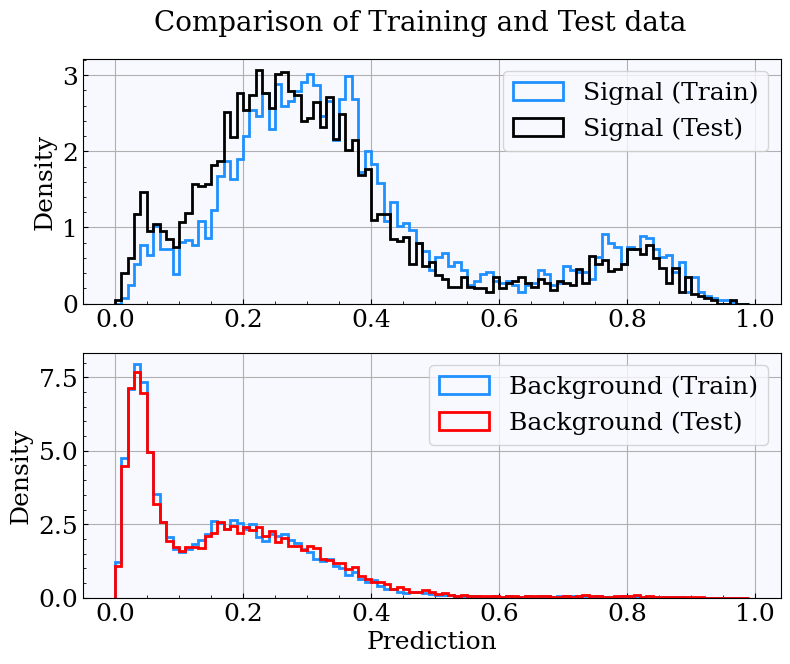

In [39]:
# Plot the training and test distributions together

fig, ax = plt.subplots(2, 1, figsize=(9, 7))
title = fig.suptitle('Comparison of Training and Test data', fontsize=20)
title.set_y(0.95)

bins = np.arange(0, 1, 0.01)

ax[0].hist(y_pred_signal_train, bins=bins, histtype='step', label='Signal (Train)', lw=2, density=True)
ax[0].hist(y_pred_signal_test, bins=bins, histtype='step', color='k', label='Signal (Test)', lw=2, density=True)

ax[1].hist(y_pred_bkg_train, bins=bins, histtype='step', label='Background (Train)', lw=2, density=True)
ax[1].hist(y_pred_bkg_test, bins=bins, histtype='step', color='red', label='Background (Test)', lw=2, density=True)

ax[0].set_ylabel('Density')
ax[1].set_xlabel('Prediction')
ax[1].set_ylabel('Density')
ax[0].legend()
ax[1].legend()

if save_plots:
    plt.savefig('Figures/Prob4_TrainTestComp.png', dpi=300)

In [36]:
# Use classifier to predict the target for the blind data

X_blind = blind_data.drop(columns=['ID'])
y_pred_bin_blind = model.predict(X_blind)
y_pred_blind = model.predict_proba(X_blind)

# Get the signal and background predictions for the blind data
y_pred_signal_blind = y_pred_blind[:, 1][y_pred_bin_blind == 1]
y_pred_bkg_blind = y_pred_blind[:, 1][y_pred_bin_blind == 0]

signal_ID = blind_data['ID'][y_pred_bin_blind == 1]
bkg_ID = blind_data['ID'][y_pred_bin_blind == 0]

# Print number of no-shows and show-ups predicted
print(f'Number of no-shows predicted: {len(signal_ID)}')
print(f'Number of show-ups predicted: {len(bkg_ID)}')

# Write to txt-files: 
np.savetxt('Data/jessen.AMAS_Exam.Problem4.NoShowTrue.txt', signal_ID, fmt='%d')
np.savetxt('Data/jessen.AMAS_Exam.Problem4.NoShowFalse.txt', bkg_ID, fmt='%d')


Number of no-shows predicted: 986
Number of show-ups predicted: 19014
